# Analyse des destinations et des populations attirées

On va s'intéresser aux fichiers :
* age_gender_bkts.csv
* countries.csv

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Analyse du fichier age_gender_bkts.csv

On s'intéresse ici à aux tranches d'âges et le sexe des utilisateurs selon le pays où ils ont fait une réservation.

In [3]:
# "Year" column is deleted because it's always equals to 2015
df = pd.read_csv('./data/age_gender_bkts.csv').drop('year', axis=1)
df.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


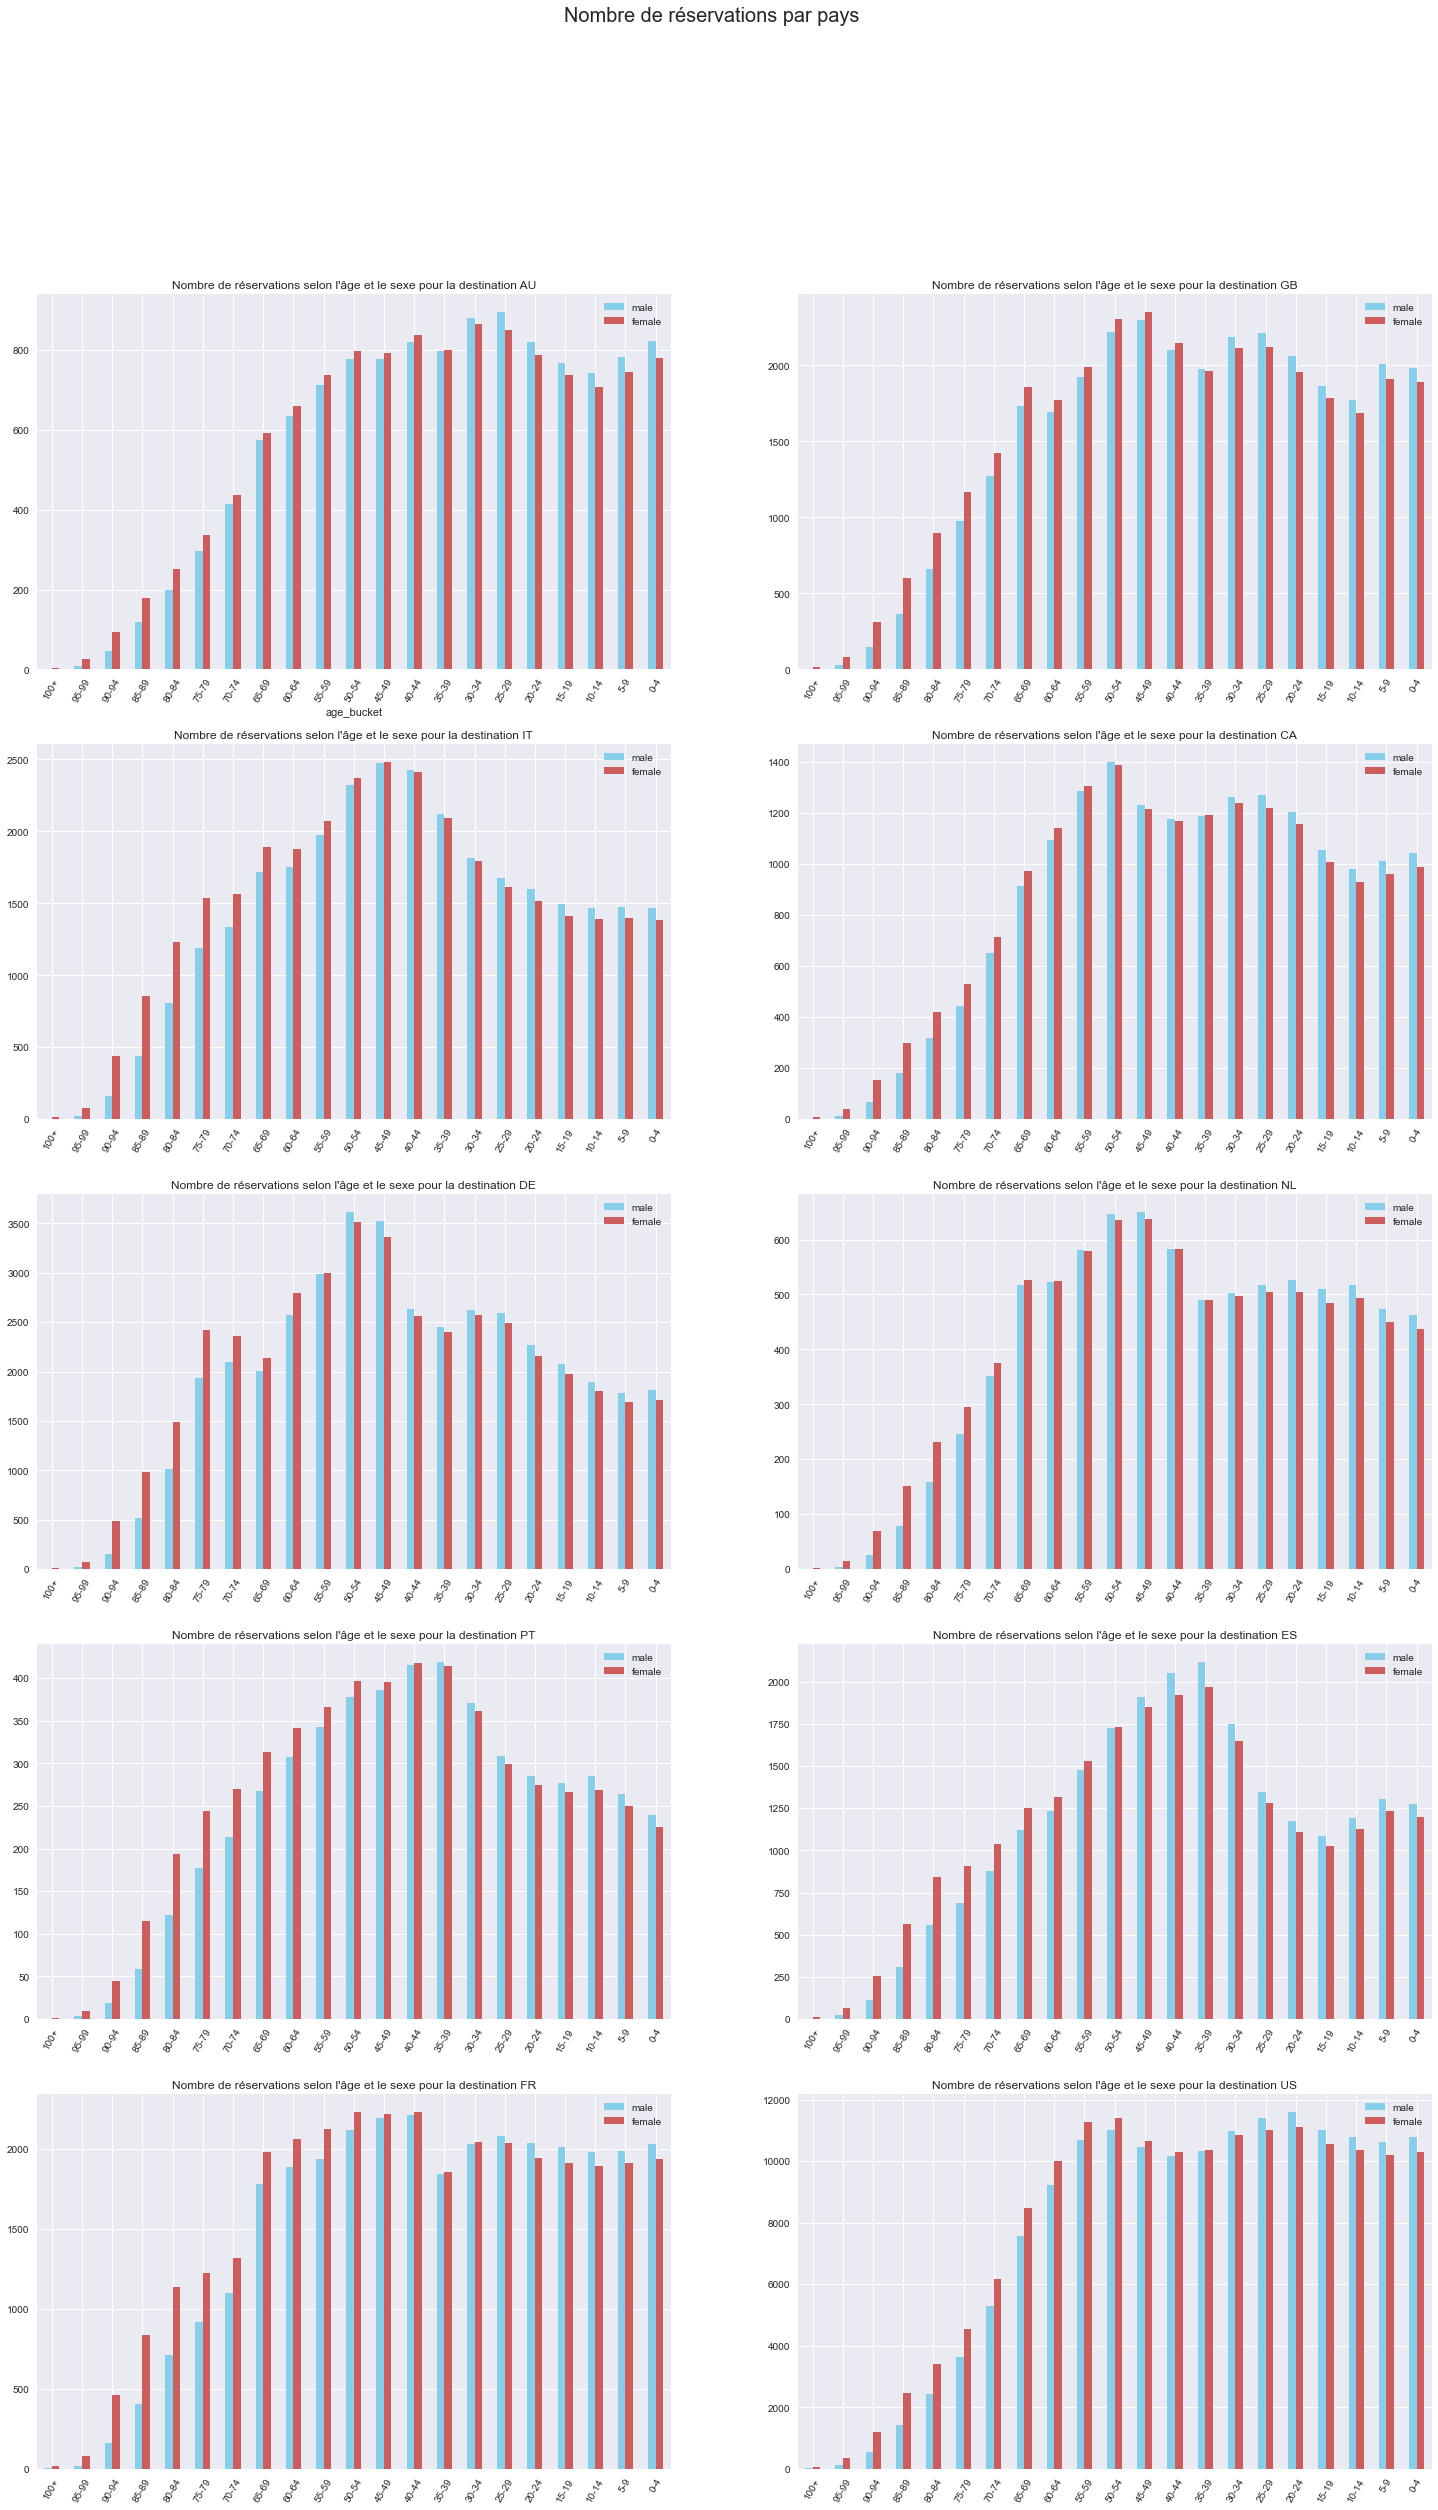

In [96]:
# Display population size by ages for each country
ages = df['age_bucket'].values[:21]
countries = df['country_destination'].unique()
fig, ax = plt.subplots(5, 2, figsize=(25, 40))
fig.suptitle('Nombre de réservations par pays', fontsize=20)
for i, country in enumerate(countries):
    current_ax = ax[i%5][i%2]
    df_country = df[(df['country_destination'] == country)].set_index('age_bucket').drop('country_destination', axis=1)
    gender_country = pd.DataFrame({'male':df_country[df_country['gender']=='male']['population_in_thousands'], 
                                   'female': df_country[df_country['gender']=='female']['population_in_thousands']})
    gender_country.loc[ages].plot.bar(ax=current_ax, color=["SkyBlue","IndianRed"],
                                      title=f"Nombre de réservations selon l'âge et le sexe pour la destination {country}")
    current_ax.set_xticklabels(ages, rotation=60)